# Posttest 8

<pre>Nama  : Alif Maulana Setyawan
NIM   : 2109106002
Kelas : A1 Informatika 2021

# Import Library

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Klasifikasi denga Dataset Tensorflow (`deep_weeds`)

In [2]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load(
    "deep_weeds",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True
)

# Encoding Label Pada Gambar 

In [3]:
num_class = 9
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test  = tf.keras.utils.to_categorical(y_test_raw, num_class)

# Preview Gambar

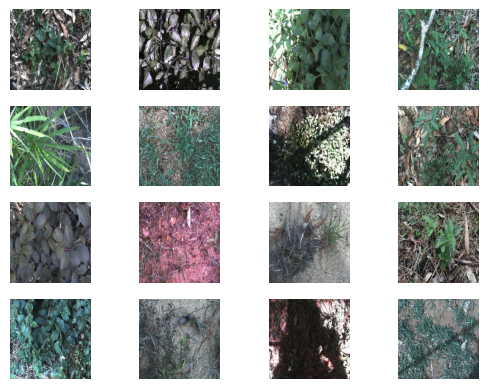

In [4]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

# Shape `x_train` dan `x_test`

In [5]:
x_train_raw.shape

TensorShape([12256, 256, 256, 3])

In [6]:
x_test_raw.shape

TensorShape([5253, 256, 256, 3])

# Konversi 28x28 jadi sebuah vektor berukuran 2352x1

In [7]:
training = tf.image.resize(x_train_raw, (28,28))
testing = tf.image.resize(x_test_raw, (28,28))

In [8]:
training = np.reshape(training.numpy(), (12256,  2352))
testing = np.reshape(testing.numpy(), (5253,  2352))

# Normalisasi piksel gambar

In [9]:
training = training.astype('float32')/255
testing = testing.astype('float32')/255

# DNN (Deep Neural Network)

Terdiri dari `3 layers`, `2 relu`, dan `neuron` berdasarkan `num_class`

In [10]:
model = Sequential([
        Dense(256, activation='relu', input_dim = (2352)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(9, activation='softmax')
        ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               602368    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 9)                 585       
                                                                 
Total params: 644,105
Trainable params: 644,105
Non-trainable params: 0
_________________________________________________________________


# Optimisasi Model

In [12]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting Training Model

In [13]:
hist = model.fit(training, y_train, batch_size=32, epochs=52, validation_data=(testing, y_test))

Epoch 1/52
383/383 [==============================] - 2s 4ms/step - loss: 1.6389 - accuracy: 0.5215 - val_loss: 1.6195 - val_accuracy: 0.5237
Epoch 2/52
383/383 [==============================] - 1s 3ms/step - loss: 1.6029 - accuracy: 0.5248 - val_loss: 1.5793 - val_accuracy: 0.5237
Epoch 3/52
383/383 [==============================] - 1s 3ms/step - loss: 1.5809 - accuracy: 0.5249 - val_loss: 1.5543 - val_accuracy: 0.5243
Epoch 4/52
383/383 [==============================] - 1s 3ms/step - loss: 1.5608 - accuracy: 0.5259 - val_loss: 1.5443 - val_accuracy: 0.5248
Epoch 5/52
383/383 [==============================] - 1s 3ms/step - loss: 1.5386 - accuracy: 0.5275 - val_loss: 1.5110 - val_accuracy: 0.5323
Epoch 6/52
383/383 [==============================] - 1s 3ms/step - loss: 1.5119 - accuracy: 0.5312 - val_loss: 1.4742 - val_accuracy: 0.5281
Epoch 7/52
383/383 [==============================] - 1s 3ms/step - loss: 1.4856 - accuracy: 0.5357 - val_loss: 1.4417 - val_accuracy: 0.5374
Epoch 

# Evaluasi Model

In [34]:
score = model.evaluate(testing, y_test)
print("TEST LOSS           : ", score [0])
print("TEST ACCURACY       : ", score [1])
print("VALIDATION LOSS     : ", hist.history['val_loss'][-1])
print("VALIDATION ACCURACY : ", hist.history['val_accuracy'][-1])

165/165 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.9160
TEST LOSS           :  0.31071463227272034
TEST ACCURACY       :  0.916047990322113
VALIDATION LOSS     :  0.31071463227272034
VALIDATION ACCURACY :  0.916047990322113
